In [1]:
import xarray as xr
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import sys
import matplotlib
import matplotlib.gridspec as gridspec
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from mpl_toolkits.axes_grid1 import AxesGrid
from matplotlib.ticker import FixedLocator
from cartopy.util import add_cyclic_point

from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cmocean
import glob
import os
import pandas as pd

all_bias=xr.open_dataset('/Users/ignasi/Desktop/Oceanography/IEO/projects/cmip6_stratification/data/processed/allbias.nc')



In [2]:
all_bias

<xarray.Dataset>
Dimensions:    (lat: 180, lon: 360, month: 12, model: 22)
Coordinates:
  * lat        (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon        (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * month      (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
  * model      (model) object 'E3SM-1-0' 'NorESM2-LM' ... 'GISS-E2' 'FIO-ESM2'
    number     int64 ...
Data variables: (12/36)
    a1         (model, month, lat, lon) float64 ...
    a2         (model, month, lat, lon) float64 ...
    a3         (model, month, lat, lon) float64 ...
    D1         (model, month, lat, lon) float64 ...
    b3         (model, month, lat, lon) float64 ...
    Fs         (model, month, lat, lon) float64 ...
    ...         ...
    std_D1     (month, lat, lon) float64 ...
    std_b3     (month, lat, lon) float64 ...
    std_Fs     (month, lat, lon) float64 ...
    std_Ft     (month, lat, lon) float64 ...
    std_curl   (month, lat, lon) float64 ...
    std_wsm    (month, lat, lon) float32 ...

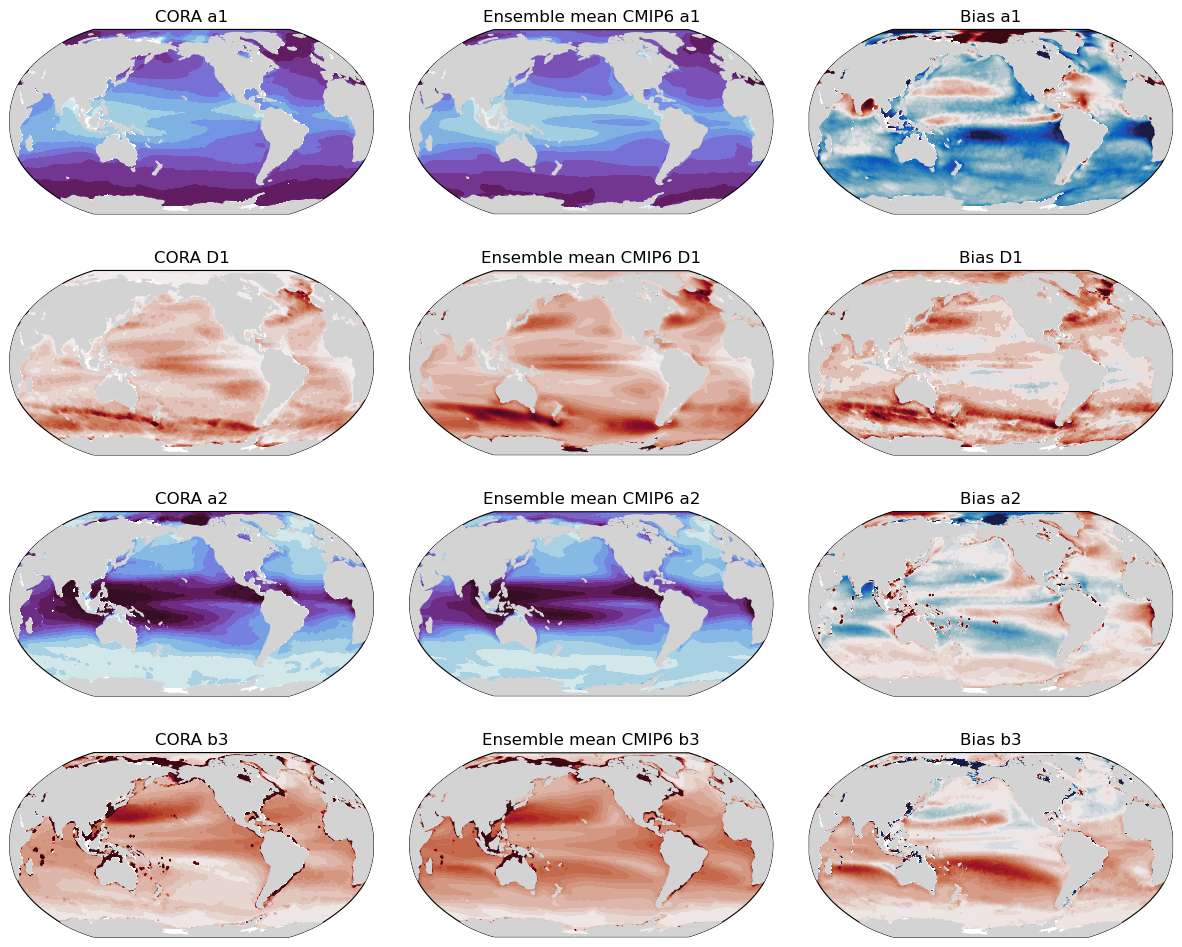

In [4]:
# Define projection
proj = ccrs.Robinson(central_longitude=210)

# Create figure and grid layout
fig = plt.figure(figsize=(15, 12))
gs = gridspec.GridSpec(4, 3, figure=fig, wspace=0.1, hspace=0.2)

# Titles and data references for each subplot
titles = [
    'CORA a1', 'Ensemble mean CMIP6 a1', 'Bias a1',
    'CORA D1', 'Ensemble mean CMIP6 D1', 'Bias D1',
    'CORA a2', 'Ensemble mean CMIP6 a2', 'Bias a2',
    'CORA b3', 'Ensemble mean CMIP6 b3', 'Bias b3',
]

data_refs = [
    all_bias.a1_obs.mean('month'), all_bias.a1.mean(('month','model')), all_bias.bias_a1.mean(('month','model')),
    all_bias.D1_obs.mean('month'), all_bias.D1.mean(('month','model')), all_bias.bias_D1.mean(('month','model')),
    all_bias.a2_obs.mean('month'), all_bias.a2.mean(('month','model')), all_bias.bias_a2.mean(('month','model')),
    all_bias.b3_obs.mean('month') * 10**3, all_bias.b3.mean(('month','model')) * 10**3, all_bias.bias_b3.mean(('month','model'))* 10**3,
]

# Define contour levels for each pair of subplots
contour_levels = [
    np.arange(20, 30, 1),np.arange(20, 30, 1),np.arange(-1, 1.05, 0.05),
    np.arange(20, 200, 10),np.arange(20, 200, 10),np.arange(-100, 110, 10),
    np.arange(0, 5.5, 0.5),np.arange(0, 5.5, 0.5),np.arange(-2, 2.1, 0.1),
    np.arange(0, 4, 0.2),np.arange(0, 4, 0.2),np.arange(-2, 2.1, 0.1)
]

cmaps=[cmocean.cm.dense, cmocean.cm.dense, cmocean.cm.balance,
      cmocean.cm.amp,cmocean.cm.amp,cmocean.cm.balance,
      cmocean.cm.dense, cmocean.cm.dense, cmocean.cm.balance,
      cmocean.cm.amp,cmocean.cm.amp,cmocean.cm.balance]

# Loop through subplots
for i in range(len(data_refs)):
    ax = fig.add_subplot(gs[i], projection=proj)
    ax.add_feature(cfeature.LAND, facecolor="lightgray", zorder=99)
    #ax.coastlines(zorder=99)
    ax.set_title(titles[i], loc='center', fontsize=12)
    
    # Gridlines
    grd = ax.gridlines(
    draw_labels=True, 
    xlocs=[], 
    ylocs=[], 
    color='k',alpha=0.5, linestyle='--')
    grd.right_labels = None
    grd.top_labels = None
    
    # Select contour levels
    levels = contour_levels[i]
    
    # Plot contour
    data = data_refs[i]
    ax.contourf(data.lon, data.lat, data, transform=ccrs.PlateCarree(), levels=levels, extend='both', cmap=cmaps[i])

# Show the figure
plt.show()


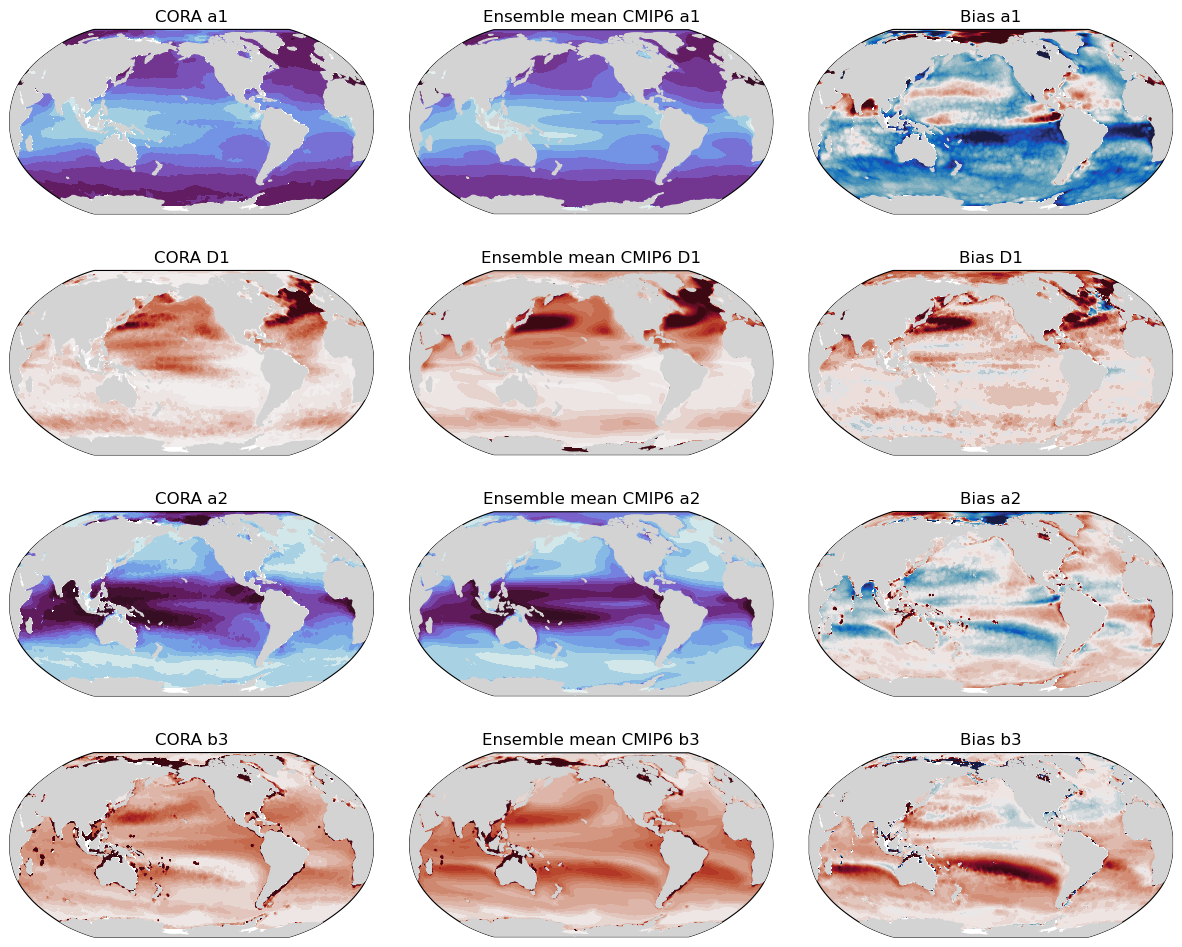

In [7]:
# Define projection
proj = ccrs.Robinson(central_longitude=210)

# Create figure and grid layout
fig = plt.figure(figsize=(15, 12))
gs = gridspec.GridSpec(4, 3, figure=fig, wspace=0.1, hspace=0.2)

all_bias_m=all_bias.sel(month=[1,2,3])

# Titles and data references for each subplot
titles = [
    'CORA a1', 'Ensemble mean CMIP6 a1', 'Bias a1',
    'CORA D1', 'Ensemble mean CMIP6 D1', 'Bias D1',
    'CORA a2', 'Ensemble mean CMIP6 a2', 'Bias a2',
    'CORA b3', 'Ensemble mean CMIP6 b3', 'Bias b3',
]

data_refs = [
    all_bias_m.a1_obs.mean('month'), all_bias_m.a1.mean(('month','model')), all_bias_m.bias_a1.mean(('month','model')),
    all_bias_m.D1_obs.mean('month'), all_bias_m.D1.mean(('month','model')), all_bias_m.bias_D1.mean(('month','model')),
    all_bias_m.a2_obs.mean('month'), all_bias_m.a2.mean(('month','model')), all_bias_m.bias_a2.mean(('month','model')),
    all_bias_m.b3_obs.mean('month') * 10**3, all_bias_m.b3.mean(('month','model')) * 10**3, all_bias_m.bias_b3.mean(('month','model'))* 10**3,
]

# Define contour levels for each pair of subplots
contour_levels = [
    np.arange(20, 30, 1),np.arange(20, 30, 1),np.arange(-1, 1.05, 0.05),
    np.arange(20, 200, 10),np.arange(20, 200, 10),np.arange(-100, 110, 10),
    np.arange(0, 5.5, 0.5),np.arange(0, 5.5, 0.5),np.arange(-2, 2.1, 0.1),
    np.arange(0, 4, 0.2),np.arange(0, 4, 0.2),np.arange(-2, 2.1, 0.1)
]

cmaps=[cmocean.cm.dense, cmocean.cm.dense, cmocean.cm.balance,
      cmocean.cm.amp,cmocean.cm.amp,cmocean.cm.balance,
      cmocean.cm.dense, cmocean.cm.dense, cmocean.cm.balance,
      cmocean.cm.amp,cmocean.cm.amp,cmocean.cm.balance]

# Loop through subplots
for i in range(len(data_refs)):
    ax = fig.add_subplot(gs[i], projection=proj)
    ax.add_feature(cfeature.LAND, facecolor="lightgray", zorder=99)
    #ax.coastlines(zorder=99)
    ax.set_title(titles[i], loc='center', fontsize=12)
    
    # Gridlines
    grd = ax.gridlines(
    draw_labels=True, 
    xlocs=[], 
    ylocs=[], 
    color='k',alpha=0.5, linestyle='--')
    grd.right_labels = None
    grd.top_labels = None
    
    # Select contour levels
    levels = contour_levels[i]
    
    # Plot contour
    data = data_refs[i]
    ax.contourf(data.lon, data.lat, data, transform=ccrs.PlateCarree(), levels=levels, extend='both', cmap=cmaps[i])

# Show the figure
plt.show()



In [9]:
obs_shdr_path="/Volumes/Thalassa/CORA_SHDR_rg/"
obs_shdr=xr.open_mfdataset(sorted(glob.glob(obs_shdr_path+'*.nc')))

In [11]:
print(obs_shdr)

<xarray.Dataset>
Dimensions:  (time: 636, param: 8, lat: 180, lon: 360, lev: 112)
Coordinates:
  * lev      (lev) float32 1.0 3.0 5.0 10.0 ... 1.16e+03 1.18e+03 1.2e+03
  * time     (time) datetime64[ns] 1970-01-01 1970-02-01 ... 2022-12-01
  * param    (param) object 'D1' 'b2' 'c2' 'b3' 'a2' 'a1' 'a3' 'em'
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
Data variables:
    shdr     (time, param, lat, lon) float64 dask.array<chunksize=(1, 8, 180, 360), meta=np.ndarray>
Attributes:
    n_lev_ratio:    112/112
    regrid_method:  bilinear


In [14]:
ds = obs_shdr.load()

/Users/ignasi/miniconda3/envs/xesmf_env/lib/python3.7/site-packages/matplotlib/contour.py:1483: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/Users/ignasi/miniconda3/envs/xesmf_env/lib/python3.7/site-packages/matplotlib/contour.py:1484: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())


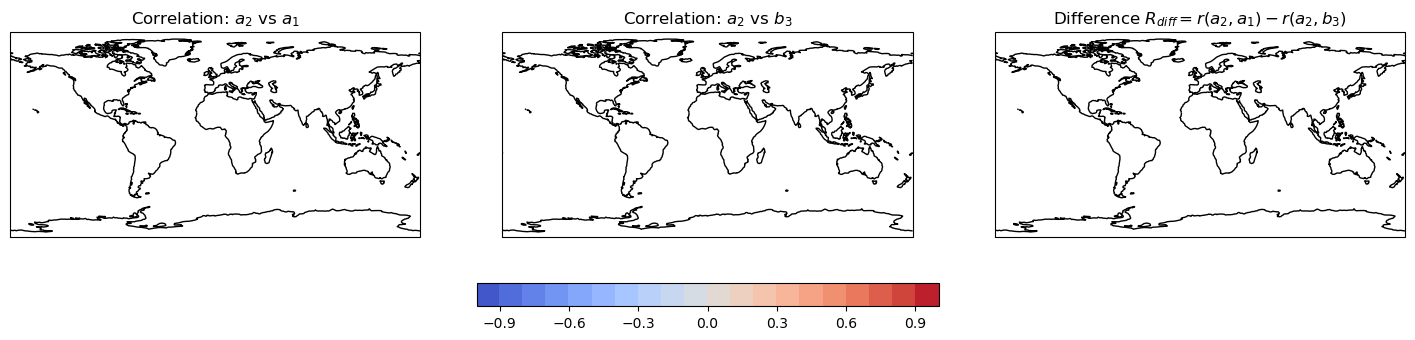

In [15]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from scipy.stats import pearsonr

# Load the CORA dataset
#file_path = "/Users/ignasi/Desktop/Oceanography/IEO/projects/cmip6_stratification/data/processed/cora.nc"

# Extract relevant variables
a2 = ds.sel(param="a2")["shdr"]  # Pycnocline amplitude
a1 = ds.sel(param="a1")["shdr"]  # Surface density
b3 = ds.sel(param="b3")["shdr"]  # Background stratification

# Remove seasonal cycle (compute anomalies)
climatology = ds.groupby("time.month").mean("time")  # Compute monthly means
ds_anom = ds.groupby("time.month") - climatology  # Subtract climatology

# Apply a 12-month rolling mean (low-pass filter)
ds_anom = ds_anom.rolling(time=12, center=True).mean()

# Extract filtered anomalies
a2 = ds_anom.sel(param="a2")["shdr"]  # Pycnocline amplitude anomaly
a1= ds_anom.sel(param="a1")["shdr"]  # Surface density anomaly
b3 = ds_anom.sel(param="b3")["shdr"]  # Background stratification anomaly




# Get lat/lon dimensions
lat = ds.lat.values
lon = ds.lon.values

# Initialize correlation matrices
r_a2_a1 = np.full((len(lat), len(lon)), np.nan)
r_a2_b3 = np.full((len(lat), len(lon)), np.nan)

# Compute correlations at each grid point
for i in range(len(lat)):
    for j in range(len(lon)):
        # Extract time series at each location
        ts_a2 = a2[:, i, j].values
        ts_a1 = a1[:, i, j].values
        ts_b3 = b3[:, i, j].values
        
        # Ensure valid data (no NaNs)
        if np.isfinite(ts_a2).all() and np.isfinite(ts_a1).all():
            r_a2_a1[i, j], _ = pearsonr(ts_a2, ts_a1)
        
        if np.isfinite(ts_a2).all() and np.isfinite(ts_b3).all():
            r_a2_b3[i, j], _ = pearsonr(ts_a2, ts_b3)

# Compute the difference map
r_diff = r_a2_a1 - r_a2_b3

# Plot the correlation maps
fig, axs = plt.subplots(1, 3, figsize=(18, 6), subplot_kw={"projection": ccrs.PlateCarree()})

# Define plotting function
def plot_map(ax, data, title, vmin=-1, vmax=1):
    ax.set_global()
    cf = ax.contourf(lon, lat, data, levels=np.linspace(vmin, vmax, 21), transform=ccrs.PlateCarree(), cmap="coolwarm")
    ax.coastlines()
    ax.set_title(title)
    return cf

# Plot each correlation map
plot_map(axs[0], r_a2_a1, "Correlation: $a_2$ vs $a_1$")
plot_map(axs[1], r_a2_b3, "Correlation: $a_2$ vs $b_3$")
cf = plot_map(axs[2], r_diff, "Difference $R_{diff} = r(a_2, a_1) - r(a_2, b_3)$")

# Add colorbar
fig.colorbar(cf, ax=axs, orientation="horizontal", fraction=0.05, pad=0.1)
plt.show()
